The purpose of this notebook is to compare different classification methods, those being: logistic regression, Bayes algorithm and discriminatory analysis. The dataset being analysed is the Iris flower data set by Fisher (1936)

# Data preparation

In [1]:
# Import libraries used for the classifiers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# Read data from CSV
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Remove unnecessary data
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Divide train and test datasets
x = df.loc[:, df.columns != 'Species']
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = df.loc[:, 'Species']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Logistic regression
Logistic regression estimates the probability of an event occurring. Since the outcome is a probability the dependant variable is boudn between 0 and 1. A logit transformation is applied on the ods, the probability of success divided by the probability of failure. 
$$
\ln \left( \frac{p(x)}{1-p(x)} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
$$

And then estimation of parameters is used to estimate the coefficients $\beta_0, \beta_1, \ldots, \beta_n$.

## Logistic regression application

In [7]:
# Standardize data
standard_scaler = StandardScaler()
standard_x = standard_scaler.fit_transform(x)

In [8]:
y_train = y_train.ravel()

In [9]:
# Logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
y_predictions_logistic = logistic_model.predict(x_test)

## Confusion matrix

In [10]:
logistic_confusion_matrix = confusion_matrix(y_test, y_predictions_logistic)

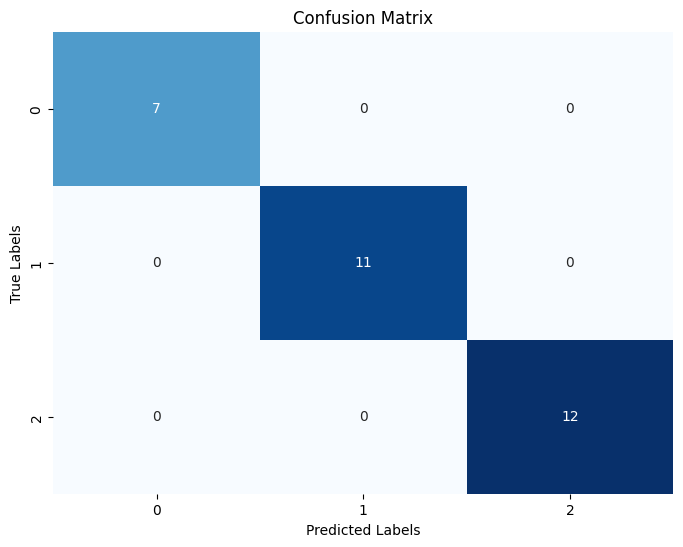

In [11]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Model accuracy

In [12]:
logistic_accuracy = accuracy_score(y_test, y_predictions_logistic)
print(f'Model Accuracy: {logistic_accuracy}')

Model Accuracy: 1.0


# References
Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179-188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x

What is logistic regression? | IBM. (n.d.). https://www.ibm.com/topics/logistic-regression